Meeting 05/08/2025 @ SISSA:
Visualization of the degree distribution of graphs **with the clique** (`p_reduce` correction).

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import os
from scipy.stats import binom

sys.path.append(os.path.abspath(os.path.join('..', '..')))

import src.graphs_generation as graphs_generation

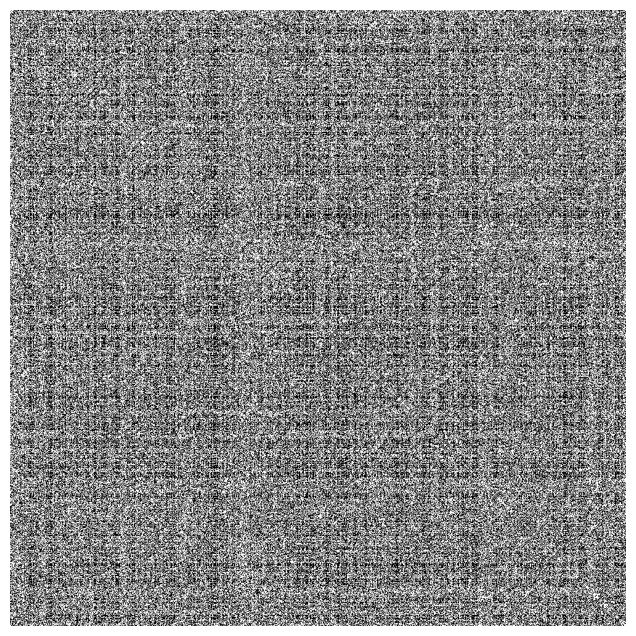

In [7]:
# visualizing input for graph of 160 nodes and clique of 70, "p_increase"
graph_with_clique = graphs_generation.generate_batch(1, 1000, [300], "p_reduce", False, p_clique=1)
# visualizing single image without axes:
plt.figure(figsize=(8, 8))
plt.axis('off')  # Remove the axes
plt.imshow(np.squeeze(graph_with_clique[0]), cmap='gray_r')
plt.show()

Each row in the matrix above represents the connections of a certain node with all the other nodes in the graph. Each node can be part of the clique or not. Therefore, we can describe the complete degree distribution of the graph by considering:
1. "p_ingroup": degree distribution of nodes that are part of the clique, follows a binomial distribution

$$ 
\begin{align*}
p_{ingroup} &= \mathrm{Binomial}(N, p_{corr}) \\
\end{align*}
$$

$$ 
\begin{align*}
P(S|X=1) &= \mathcal{N}\Big(p_1 \Big(\frac{n (n-1)}{2} - \frac{k (k-1)}{2}\Big) + \frac{k (k-1)}{2}, p_1 (1-p_1) \Big(\frac{n (n-1)}{2} - \frac{k (k-1)}{2}\Big)\Big)
\end{align*}
$$


2. "p_outgroup": degree distribution of nodes that are NOT part of the clique, follows a binomial distribution
$$ 
\begin{align*}
p_{outgroup} &= \mathrm{Binomial}(N, p_{corr}) \\
\end{align*}
$$


Where:
- $K$ is the degree of the graph;
- $N$ is the size of the graph;
- $k$ is the size of the planted clique;
- $p$ is the original probability of association (0.5 by default);
- $p_{corr}$ is the corrected probability of association, calculated as: $$p_{corr}=\frac{p \cdot n (n-1) - k (k-1)}{(n - k)(n + k - 1)}$$

The complete distribution of a graph with the clique is given by a mixture of "p_ingroup" and "p_outgroup":
$$

$$

In [8]:
def p_correction(p_nodes, graph_size, clique_size):
    '''Returns the value of the corrected p-value in the graph with clique ("p_reduce" case) '''
    p_corrected = (
        p_nodes * graph_size * (graph_size - 1)
        - clique_size * (clique_size - 1)
    ) / ((graph_size - clique_size) * (graph_size + clique_size - 1))
    return p_corrected

def p_outgroup(clique_size, graph_size, degree):
    '''Returns the degree distribution for the nodes that are NOT part of the clique'''
    return binom.pmf(degree, graph_size, p_correction(0.5, graph_size, clique_size))

def p_ingroup(clique_size, graph_size, degree):
    '''Returns the degree distribution for the nodes that ARE part of the clique'''
    return binom.pmf(degree - clique_size, graph_size - clique_size, p_correction(0.5, graph_size, clique_size))

def degree_distribution(clique_size, graph_size, degree):
    '''Combines p_outgroup and p_ingroup (mixture) to obtain the complete degree distribution of the graph with the clique'''
    return clique_size/graph_size * p_ingroup(clique_size, graph_size, degree) + (1-clique_size/graph_size) * p_outgroup(clique_size, graph_size, degree)

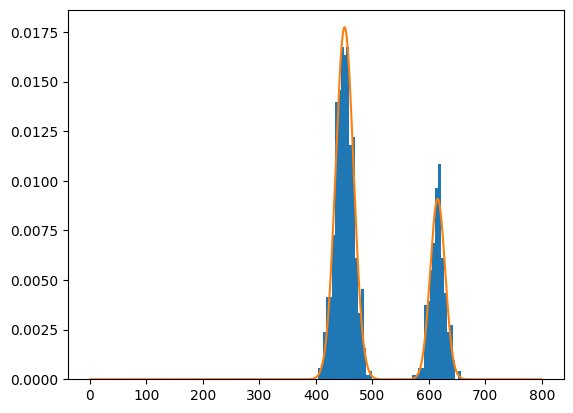

In [14]:
# plotting "empirical" degree distribution of the graph:
plt.hist(np.sum(np.array(np.squeeze(graph_with_clique[0])), axis=1), bins=50, density=True)
# plotting the "expected" degree distribution of the graph:
degree_range = np.arange(1, 800, dtype="int")
plt.plot(degree_range, degree_distribution(300, 1000, degree_range))